In [1]:
def Data_Preprocessing_Single(File_Name,Label_Name,plot_draw):

    # importing pandas csv library:
    import pandas as pd

    # stroing csv in variable:
    dataframe = pd.read_csv(File_Name)

    # Showing number of attributes:
    dataframe.shape

    # showing the statistics of the dataset: 
    dataframe.describe()

    # number of missing values in the dataset:
    dataframe.isnull().sum()

    # number of duplicate values in the dataset
    dataframe[dataframe.duplicated(keep=False)]

    # dropping row if target is null
    dataframe.dropna(subset=[Label_Name], inplace=True)

    # replacing any null number values with columnwise mean:
    dataframe.fillna(dataframe.select_dtypes(include=['number']).mean(), inplace=True)

    # replacing any null object values with columnwise most frequent:
    for column in dataframe.select_dtypes(include=['object']).columns:
        most_frequent = dataframe[column].mode()[0]
        dataframe[column].fillna(most_frequent, inplace=True)

    # keeping one copy of row if duplicate row found
    dataframe.drop_duplicates(inplace=True)

    # splitting data between Features and Labels
    Features = dataframe.drop(Label_Name, axis=1)
    Labels = dataframe[Label_Name]

    #using label encoding for some binary value columns
    from sklearn.preprocessing import LabelEncoder

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate over the object columns and apply label encoding to columns with two unique values
    for col in Features.select_dtypes(include=['object']).columns:
        if Features[col].nunique() == 2:  # Check if the column has only two unique values
            Features[col] = label_encoder.fit_transform(Features[col])

    # showing data types of Features
    Features.dtypes

    # List of columns to convert to categorical
    categorical_columns = Features.select_dtypes(include=['object']).columns.tolist()

    # Convert non numeric columns to categorical type
    for col in categorical_columns:
        Features[col] = Features[col].astype('category')

    # showing data types of Features
    Features.dtypes

    # One hot encoding
    Features = pd.get_dummies(Features)

    # Convert only boolean columns back to 0 and 1
    boolean_columns = Features.select_dtypes(include=['bool']).columns

    # Convert the selected boolean columns to integers (0 and 1)
    Features[boolean_columns] = Features[boolean_columns].astype(int)
    Features

    # showing features datatypes
    Features.dtypes

    # scaling type
    scaling_type = "minmax"
    #scaling_type = "standard"

    def scaling(Features, scaling_type):
        # Identify binary columns (columns with only two unique values)
        binary_columns = [col for col in Features.columns if len(Features[col].unique()) == 2]
        
        # Separate binary and non-binary columns
        non_binary_columns = Features.columns.difference(binary_columns)
        
        if scaling_type == "minmax":
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
        elif scaling_type == "standard":
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()

        # Apply scaling only to non-binary columns
        Features_scaled = Features.copy()
        Features_scaled[non_binary_columns] = scaler.fit_transform(Features[non_binary_columns])
        
        return Features_scaled

    features_normalized = scaling(Features,scaling_type)

    # features and labels are put into dataframe
    features_df = pd.DataFrame(features_normalized, columns=Features.columns) # scaled feature dataframe
    labels_df = pd.DataFrame(Labels, columns=[Label_Name])

    # Check if all columns in labels_df are of type int64
    if (labels_df[Label_Name].dtypes != "int64"):
        unique_values = labels_df[Label_Name].unique()
        value_map = {unique_values[0]: 1, unique_values[1]: 0}
        labels_df[Label_Name] = labels_df[Label_Name].map(value_map)
 
    target_series = labels_df[Label_Name]
    correlations = features_df.corrwith(target_series) #contribution of each column
    correlations

    top_20_correlations = correlations.abs().sort_values(ascending=False).head(20)
    top_20_correlations

    import matplotlib.pyplot as plt
    import numpy as np

    # Assuming 'correlations' is a Pandas Series with feature correlation values
    # Sort correlations and get the top 20
    top_20_features = top_20_correlations.index

    if plot_draw:
        # Loop through each of the top 20 features
        for feature in top_20_features:
            # Separate the data based on the Attrition class
            class_0 = features_df[labels_df[Label_Name] == 0]
            class_1 = features_df[labels_df[Label_Name] == 1]

            # Plot 1D scatter plot
            plt.figure(figsize=(8, 4))
            plt.plot(class_0[feature], np.zeros_like(class_0[feature]), 'o', label=Label_Name+' 0')
            plt.plot(class_1[feature], np.zeros_like(class_1[feature]), 'o', label=Label_Name+' 1')

            plt.legend()
            plt.xlabel(feature)
            plt.title(f'1D Scatter Plot of {feature} by {Label_Name} Classes')
            plt.show()

    #Importnecessarylibraries
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split

    top_20_features = top_20_correlations.index
    selected_features = Features[top_20_features]
    features_df = pd.DataFrame(features_normalized[selected_features.columns], columns=selected_features.columns)

    X_train,X_test,y_train,y_test=train_test_split(features_df,labels_df, test_size=0.2,random_state=42)

    X_train=X_train.values
    X_test=X_test.values
    y_train=y_train.values
    y_test=y_test.values

    return X_train,X_test,y_train,y_test

In [2]:
def Data_Preprocessing(File_Name):
    # importing pandas csv library:
    import pandas as pd
    import numpy as np

    column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
    ]

    Label_Name='income'

    # stroing csv in variable:
    dataframe = pd.read_csv(File_Name, header=None, names=column_names)

    #replace '?' as not a number
    dataframe.replace('?', np.nan, inplace=True)

    dataframe['age'] = dataframe['age'].astype('Int64')
    dataframe['fnlwgt'] = dataframe['fnlwgt'].astype('Int64')
    dataframe['education_num'] = dataframe['education_num'].astype('Int64')
    dataframe['capital_gain'] = dataframe['capital_gain'].astype('Int64')
    dataframe['capital_loss'] = dataframe['capital_loss'].astype('Int64')
    dataframe['hours_per_week'] = dataframe['hours_per_week'].astype('Int64')

    # Showing number of attributes:
    dataframe.shape

    # showing the statistics of the dataset: 
    dataframe.describe()

    # number of missing values in the dataset:
    dataframe.isnull().sum()

    # number of duplicate values in the dataset
    dataframe[dataframe.duplicated(keep=False)]

    # dropping row if target is null
    dataframe.dropna(subset=[Label_Name], inplace=True)

    # replacing any null number values with columnwise mean:
    dataframe.fillna(dataframe.select_dtypes(include=['number']).mean(), inplace=True)

    # replacing any null object values with columnwise most frequent:
    for column in dataframe.select_dtypes(include=['object']).columns:
        most_frequent = dataframe[column].mode()[0]
        dataframe[column].fillna(most_frequent, inplace=True)

    # keeping one copy of row if duplicate row found
    dataframe.drop_duplicates(inplace=True)

    # splitting data between Features and Labels
    Features = dataframe.drop(Label_Name, axis=1)
    Labels = dataframe[Label_Name]

    #using label encoding for some binary value columns
    from sklearn.preprocessing import LabelEncoder

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate over the object columns and apply label encoding to columns with two unique values
    for col in Features.select_dtypes(include=['object']).columns:
        if Features[col].nunique() == 2:  # Check if the column has only two unique values
            Features[col] = label_encoder.fit_transform(Features[col])

    # showing data types of Features
    Features.dtypes

    # List of columns to convert to categorical
    categorical_columns = Features.select_dtypes(include=['object']).columns.tolist()

    # Convert non numeric columns to categorical type
    for col in categorical_columns:
        Features[col] = Features[col].astype('category')

    # showing data types of Features
    Features.dtypes

    # One hot encoding
    Features = pd.get_dummies(Features)

    # Convert only boolean columns back to 0 and 1
    boolean_columns = Features.select_dtypes(include=['bool']).columns

    # Convert the selected boolean columns to integers (0 and 1)
    Features[boolean_columns] = Features[boolean_columns].astype(int)
    Features

    # showing features datatypes
    Features.dtypes

    # scaling type
    scaling_type = "minmax"
    #scaling_type = "standard"

    def scaling(Features, scaling_type):
        # Identify binary columns (columns with only two unique values)
        binary_columns = [col for col in Features.columns if len(Features[col].unique()) == 2]
        
        # Separate binary and non-binary columns
        non_binary_columns = Features.columns.difference(binary_columns)
        
        if scaling_type == "minmax":
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
        elif scaling_type == "standard":
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()

        # Apply scaling only to non-binary columns
        Features_scaled = Features.copy()
        Features_scaled[non_binary_columns] = scaler.fit_transform(Features[non_binary_columns])
        
        return Features_scaled

    features_normalized = scaling(Features,scaling_type)

    # features and labels are put into dataframe
    features_df = pd.DataFrame(features_normalized, columns=Features.columns) # scaled feature dataframe
    labels_df = pd.DataFrame(Labels, columns=[Label_Name])

    # Check if all columns in labels_df are of type int64
    if (labels_df[Label_Name].dtypes != "int64"):
        unique_values = labels_df[Label_Name].unique()
        value_map = {unique_values[0]: 1, unique_values[1]: 0}
        labels_df[Label_Name] = labels_df[Label_Name].map(value_map)

    return features_df,labels_df,Features,features_normalized,Label_Name



In [3]:
def Data_Preprocessing_Seperated(File_Name_Train,File_Name_Test,plot_draw):
 
    features_df,labels_df,Features,features_normalized,Label_Name=Data_Preprocessing(File_Name_Train)

    target_series = labels_df[Label_Name]
    correlations = features_df.corrwith(target_series) #contribution of each column
    correlations

    top_20_correlations = correlations.abs().sort_values(ascending=False).head(20)
    top_20_correlations

    import matplotlib.pyplot as plt
    import numpy as np

    # Assuming 'correlations' is a Pandas Series with feature correlation values
    # Sort correlations and get the top 20
    top_20_features = top_20_correlations.index

    if plot_draw:
        #Loop through each of the top 20 features
        for feature in top_20_features:
            # Separate the data based on the Attrition class
            class_0 = features_df[labels_df[Label_Name] == 0]
            class_1 = features_df[labels_df[Label_Name] == 1]

            # Plot 1D scatter plot
            plt.figure(figsize=(8, 4))
            plt.plot(class_0[feature], np.zeros_like(class_0[feature]), 'o', label=Label_Name+' 0')
            plt.plot(class_1[feature], np.zeros_like(class_1[feature]), 'o', label=Label_Name+' 1')

            plt.legend()
            plt.xlabel(feature)
            plt.title(f'1D Scatter Plot of {feature} by {Label_Name} Classes')
            plt.show()

    #Importnecessarylibraries

    import pandas as pd
    import numpy as np

    top_20_features = top_20_correlations.index
    selected_features = Features[top_20_features]
    features_df = pd.DataFrame(features_normalized[selected_features.columns], columns=selected_features.columns)

    X_train=features_df.values
    y_train=labels_df.values

    features_df_2,labels_df_2,Features_2,features_normalized_2,Label_Name=Data_Preprocessing(File_Name_Test)
    features_df_2 = pd.DataFrame(features_normalized_2[selected_features.columns], columns=selected_features.columns)

    X_test=features_df_2.values
    y_test=labels_df_2.values

    return X_train,X_test,y_train,y_test

In [4]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt


In [5]:
class LR:
    def __init__(self, alpha, iters):
        self.alpha = alpha
        self.iters = iters

    def sigmoid(self,z):
        g = 1/(1+np.exp(-z))
        return g

    def compute_gradient_logistic(self,X, y): 
        m, n = X.shape
        
        # W is a vector of shape (n,)
        W = self.w
        # B is a scalar value
        B = self.b

        # Compute the model's predictions
        z = np.dot(X, W) + B  # (m,)
        f_wb = self.sigmoid(z)          # (m,)
       
        # Compute the error
        y = np.squeeze(y)
        error = f_wb - y                # (m,)

        # Compute gradients
        dj_dw = np.dot(X.T, error) / m  # (n,)
        dj_db = np.sum(error) / m       # scalar

        return dj_db, dj_dw
    
    def fit(self,X, y): 
        # Dynamically initialize self.w and self.b based on X's shape
        m, n = X.shape
        self.w = np.zeros(n)  # w initialized as a vector of zeros with size equal to the number of features (n)
        self.b = 0            # b initialized as a scalar

        #fit the w and b to X and y using gradient descent
        for i in range(self.iters):
            # Calculate the gradient and update the parameters
            dj_db, dj_dw = self.compute_gradient_logistic(X, y)   

            # Update Parameters using w, b, alpha and gradient
            self.w = self.w - self.alpha * dj_dw               
            self.b = self.b - self.alpha * dj_db               
    
    def predict(self,X):
        results = [] 
        for x in X:
            logistic_model = self.sigmoid(np.dot(x, self.w) + self.b)
            if logistic_model > 0.5:
                results.append(1)
            else:
                results.append(0)
        return np.array(results) 
    
    def predict_proba(self, X):
        # Predict probabilities of the positive class
        z = np.dot(X, self.w) + self.b
        probs = self.sigmoid(z)
        return probs
    

In [6]:
def logistic_regression(X_train,y_train,X_test,y_test,alph,iters):
    from sklearn.metrics import accuracy_score
    import numpy as np
    import pandas as pd

    lr = LR( alph, iters)
    lr.fit(X_train, y_train) 

    y_pred = lr.predict(X_test)
    y_pred_proba = lr.predict_proba(X_test)

    df_y_test = pd.DataFrame(y_test)
    df_y_pres = pd.DataFrame(y_pred)
    accuracy2=accuracy_score(df_y_test,df_y_pres)

   
    
    return y_pred,y_pred_proba

In [7]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
   
    sensitivity = recall_score(y_test, y_pred,average='weighted')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    precision = precision_score(y_test, y_pred,average='weighted')

    f1 = f1_score(y_test, y_pred)

    auroc = roc_auc_score(y_test, y_pred_proba)

    aupr = average_precision_score(y_test, y_pred_proba)

    return accuracy,sensitivity,specificity, precision,f1,auroc,aupr

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def collect_metrics(models, X_test, y_test):
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Sensitivity': [],
        'Specificity': [],
        'Precision': [],
        'F1-Score': [],
        'AUROC': [],
        'AUPR': []
    }
    
    for i, model in enumerate(models):
        accuracy, sensitivity, specificity, precision, f1, auroc, aupr = evaluate_model(model, X_test, y_test)
        metrics['Model'].append(f'Model {i+1}')
        metrics['Accuracy'].append(accuracy)
        metrics['Sensitivity'].append(sensitivity)
        metrics['Specificity'].append(specificity)
        metrics['Precision'].append(precision)
        metrics['F1-Score'].append(f1)
        metrics['AUROC'].append(auroc)
        metrics['AUPR'].append(aupr)
    
    return pd.DataFrame(metrics)

# Function to plot violin plots
def plot_violin(metrics_df):
    # Melt the DataFrame to long format
    metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
    
    # Create the violin plot using seaborn
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Metric', y='Score', data=metrics_melted, inner='point', palette='Set2')
    
    plt.xticks(rotation=45)
    plt.title('Model Performance Metrics Distribution')
    plt.tight_layout()
    plt.show()


In [9]:
def Bagging(X_train, y_train,alph, iters,n_models):    
    import numpy as np
    from sklearn.utils import resample
    
    models = []

    for i in range(n_models):
        X_resampled, y_resampled = resample(X_train, y_train, replace=True, random_state=i)
        model = LR( alph, iters)
        model.fit(X_resampled, y_resampled)
        models.append(model)

    return models

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

def LR_star(models, X_test, y_test):
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Sensitivity': [],
        'Specificity': [],
        'Precision': [],
        'F1-Score': [],
        'AUROC': [],
        'AUPR': []
    }

    for model in models:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auroc = roc_auc_score(y_test, y_pred_proba)
        aupr = average_precision_score(y_test, y_pred_proba)

        metrics['Model'].append(model.__class__.__name__)
        metrics['Accuracy'].append(accuracy)
        metrics['Sensitivity'].append(sensitivity)
        metrics['Specificity'].append(specificity)
        metrics['Precision'].append(precision)
        metrics['F1-Score'].append(f1)
        metrics['AUROC'].append(auroc)
        metrics['AUPR'].append(aupr)

    metrics_df = pd.DataFrame(metrics)

    # Calculate mean and standard deviation and print them
    for metric in ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score', 'AUROC', 'AUPR']:
        mean_value = metrics_df[metric].mean()
        std_value = metrics_df[metric].std()
        print(f'{metric}: {mean_value:.6f} ± {std_value:.6f}')

    
   

In [11]:
def Stacking(X_train, X_test, y_train, y_test, alph, iters, models, n_models):
    from sklearn.metrics import accuracy_score
    import numpy as np

    # Generate predictions and probabilities from base learners (for both training and test sets)
    train_meta_features = np.zeros((X_train.shape[0], n_models))
    test_meta_features = np.zeros((X_test.shape[0], n_models))
    test_meta_features_proba = np.zeros((X_test.shape[0], n_models))  # For predicted probabilities

    for i, model in enumerate(models):
        # Assuming base learners have predict_proba method
        train_meta_features[:, i] = model.predict(X_train)
        test_meta_features[:, i] = model.predict(X_test)
        test_meta_features_proba[:, i] = model.predict_proba(X_test)  # Get probabilities for class 1

    # Meta learner
    meta_model = LR(alph, iters)
    meta_model.fit(train_meta_features, y_train)

    # Meta learner predictions
    stacked_predictions = meta_model.predict(test_meta_features)
    stacked_probabilities = meta_model.predict_proba(test_meta_features)  # Predicted probabilities for class 1

    # Evaluate stacking ensemble
    stacked_accuracy = accuracy_score(y_test, stacked_predictions)
  

    return stacked_predictions, stacked_probabilities

In [12]:
def Majority_Voting(X_test, y_test, models, n_models):
    from sklearn.metrics import accuracy_score
    from scipy import stats
    import numpy as np

    # Get the predictions of all base learners
    test_predictions = np.zeros((X_test.shape[0], n_models))
    test_probabilities = np.zeros((X_test.shape[0], n_models))  # For predicted probabilities

    for i, model in enumerate(models):
        test_predictions[:, i] = model.predict(X_test)
        test_probabilities[:, i] = model.predict_proba(X_test)  # Probabilities for class 1

    # Perform majority voting
    voted_predictions = stats.mode(test_predictions, axis=1)[0].ravel()

    # Average probabilities for voting
    voted_probabilities = np.mean(test_probabilities, axis=1)

    # Evaluate majority voting ensemble
    voting_accuracy = accuracy_score(y_test, voted_predictions)
   

    return voted_predictions, voted_probabilities

In [13]:
def metrics(y_test, y_pred, y_pred_proba):
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.6f}')

    sensitivity = recall_score(y_test, y_pred)
    print(f'Sensitivity (Recall): {sensitivity:.6f}')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f'Specificity: {specificity:.6f}')

    precision = precision_score(y_test, y_pred)
    print(f'Precision: {precision:.6f}')

    f1 = f1_score(y_test, y_pred)
    print(f'F1-Score: {f1:.6f}')

    auroc = roc_auc_score(y_test, y_pred_proba)
    print(f'AUROC: {auroc:.6f}')

    aupr = average_precision_score(y_test, y_pred_proba)
    print(f'AUPR: {aupr:.6f}')

In [14]:
def full_pipeline(X_train,X_test,y_train,y_test,alph,iters,n_models):
    
     models = Bagging(X_train, y_train,alph, iters,n_models)
     metrics_df = collect_metrics(models, X_test, y_test)
     # Plot metrics
     plot_violin(metrics_df)

     print("Logistic Regression Metrics:")
     LR_star(models, X_test, y_test)
     

     print("\n")
     print("Stacking Ensamble Metrics:")
     y_pred,y_pred_proba = Stacking(X_train,X_test,y_train,y_test,alph,iters,models,n_models)
     metrics(y_test, y_pred,y_pred_proba)
    
     print("\n")
     print("Majority Voting Ensamble Metrics:")
     y_pred,y_pred_proba = Majority_Voting(X_test,y_test,models,n_models)
     metrics(y_test, y_pred,y_pred_proba)
    

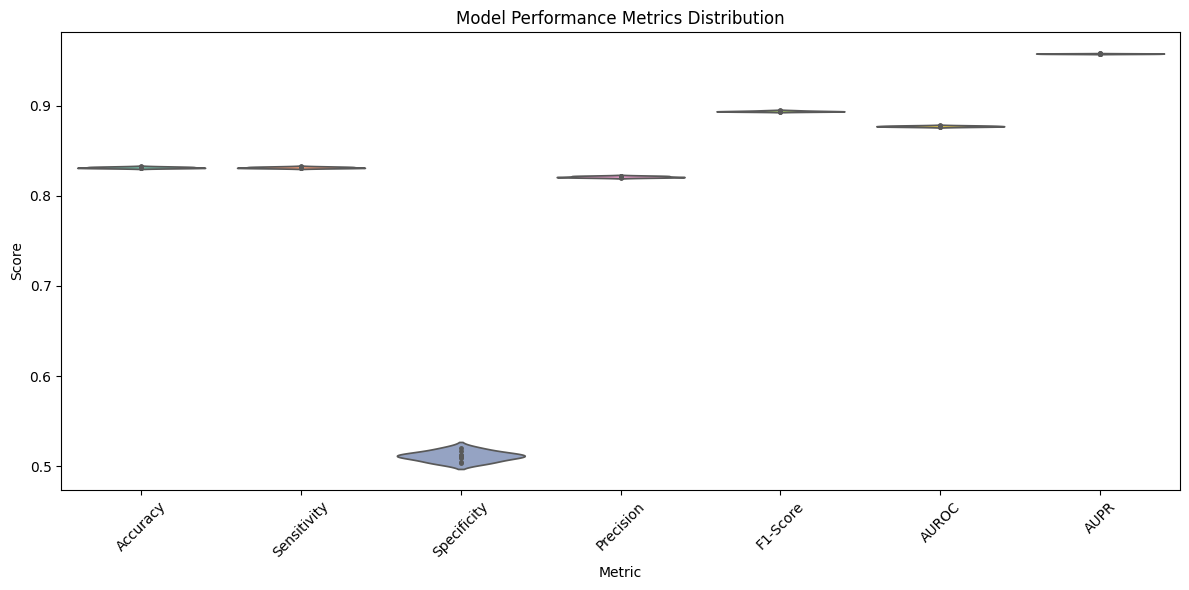

Logistic Regression Metrics:
Accuracy: 0.831647 ± 0.000671
Sensitivity: 0.930821 ± 0.001901
Specificity: 0.511123 ± 0.005261
Precision: 0.860213 ± 0.001082
F1-Score: 0.894123 ± 0.000505
AUROC: 0.877477 ± 0.000553
AUPR: 0.957981 ± 0.000220


Stacking Ensamble Metrics:
Accuracy: 0.832145
Sensitivity (Recall): 0.931939
Specificity: 0.509620
Precision: 0.859985
F1-Score: 0.894517
AUROC: 0.729032
AUPR: 0.857636


Majority Voting Ensamble Metrics:
Accuracy: 0.831715
Sensitivity (Recall): 0.930571
Specificity: 0.512220
Precision: 0.860448
F1-Score: 0.894137
AUROC: 0.877621
AUPR: 0.958043
------------------------------------------------------------------------------------------------------------


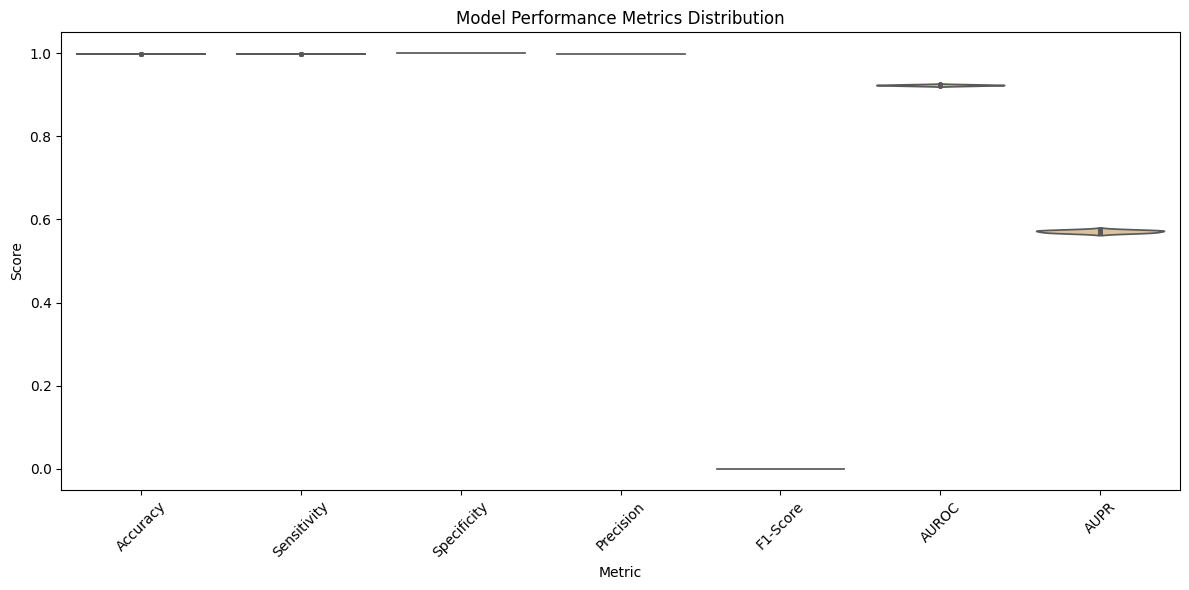

Logistic Regression Metrics:
Accuracy: 0.998414 ± 0.000000
Sensitivity: 0.000000 ± 0.000000
Specificity: 1.000000 ± 0.000000
Precision: 0.000000 ± 0.000000
F1-Score: 0.000000 ± 0.000000
AUROC: 0.923133 ± 0.001311
AUPR: 0.571294 ± 0.003236


Stacking Ensamble Metrics:
Accuracy: 0.998414
Sensitivity (Recall): 0.000000
Specificity: 1.000000
Precision: 0.000000
F1-Score: 0.000000
AUROC: 0.500000
AUPR: 0.001586


Majority Voting Ensamble Metrics:
Accuracy: 0.998414
Sensitivity (Recall): 0.000000
Specificity: 1.000000
Precision: 0.000000
F1-Score: 0.000000
AUROC: 0.923206
AUPR: 0.571808


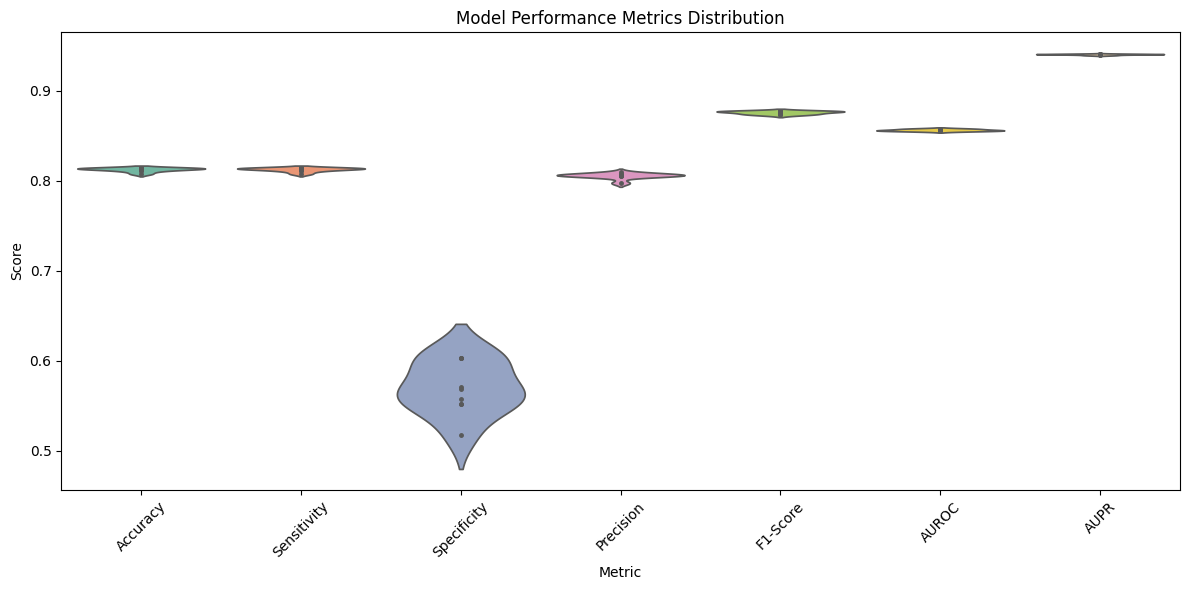

Logistic Regression Metrics:
Accuracy: 0.812554 ± 0.002200
Sensitivity: 0.899936 ± 0.010043
Specificity: 0.569854 ± 0.029280
Precision: 0.853299 ± 0.007177
F1-Score: 0.875924 ± 0.001747
AUROC: 0.856426 ± 0.001069
AUPR: 0.940539 ± 0.000561


Stacking Ensamble Metrics:
Accuracy: 0.814053
Sensitivity (Recall): 0.900579
Specificity: 0.573727
Precision: 0.854396
F1-Score: 0.876880
AUROC: 0.760539
AUPR: 0.857377


Majority Voting Ensamble Metrics:
Accuracy: 0.816182
Sensitivity (Recall): 0.902510
Specificity: 0.576408
Precision: 0.855444
F1-Score: 0.878347
AUROC: 0.857248
AUPR: 0.940858


In [15]:
import warnings
warnings.filterwarnings("ignore")

alph = 0.1
iters = 3000
n_models = 9
plot_draw = False

print("------------------------------------------------------------------------------------------------------------")

X_train,X_test,y_train,y_test = Data_Preprocessing_Single("WA_Fn-UseC_-Telco-Customer-Churn.csv","Churn",plot_draw)
full_pipeline(X_train,X_test,y_train,y_test,alph,iters,n_models)

print("------------------------------------------------------------------------------------------------------------")

# X_train,X_test,y_train,y_test = Data_Preprocessing_Seperated("adult/adult.data","adult/adult.test",plot_draw)
# full_pipeline(X_train,X_test,y_train,y_test,alph,iters,n_models)

print("------------------------------------------------------------------------------------------------------------")

# X_train,X_test,y_train,y_test = Data_Preprocessing_Single("creditcard.csv","Class",plot_draw)
# full_pipeline(X_train,X_test,y_train,y_test,alph,iters,n_models)

